### Introduction



### Preparation

##### Import the libraries 

In [1]:
import numpy as np
import pandas 
import sklearn.linear_model as linear
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import scikitplot as skplt

 ##### Read In all the datasets here. 

In [2]:
# diet_level_df = pandas.read_csv("datasets/hh_mod_g1.csv")
diet_group_df = pandas.read_csv("datasets/hh_mod_g2.csv")
diet_grouped_df = pandas.read_excel("datasets/UrbanProtein.xlsx")
hh_info_df = pandas.read_csv("datasets/hh_mod_a_filt.csv")

##### A quick overview of our datasets

In [3]:
def overview(df):
    print("This dataset has {} entries {} variables".format(df.shape[0],df.shape[1]))
    print(df.head(3))
    print(df.columns)

overview(diet_group_df)
overview(hh_info_df)

This dataset has 12447 entries 12 variables
        case_id                              HHID  hh_g08a  hh_g08b  hh_g08c  \
0  101011000030  c58e3284fee84a598b22086985e8212a      7.0      4.0      2.0   
1  101011000043  df2f79020a7a4b1c889edca2005183b8      6.0      3.0      3.0   
2  101011000053  755889c7f7294da39fb08cde3e0e70ee      7.0      1.0      2.0   

   hh_g08d  hh_g08e  hh_g08f  hh_g08g  hh_g08h  hh_g08i  hh_g08j  
0      7.0      0.0      0.0      0.0      5.0      0.0      7.0  
1      6.0      4.0      1.0      1.0      6.0      7.0      7.0  
2      7.0      2.0      1.0      6.0      7.0      6.0      7.0  
Index(['case_id', 'HHID', 'hh_g08a', 'hh_g08b', 'hh_g08c', 'hh_g08d',
       'hh_g08e', 'hh_g08f', 'hh_g08g', 'hh_g08h', 'hh_g08i', 'hh_g08j'],
      dtype='object')
This dataset has 12447 entries 20 variables
        case_id                              HHID     ea_id  region  district  \
0  301025230225  0001c970eecf473099368557e2080b3e  30102523       3       30

In [ ]:
# def merge_clean_data():
#     merged_df = pandas.merge(diet_level_df,hh_info_df,on="case_id")
#     merged_level_df = merged_df[merged_df["case_id","hh_g00_1", "hh_g00_2"
#                                     ,"hh_g01_oth","hh_g02","hh_g03a"
#                                    ,"hh_g03b"]]
#     return merged_level_df

# merged_df = merge_clean_data()
# overview(merged_df)
    

### Regression Approach 

##### Here we perform some basic regressions. We are interested to see if there is any correlations between distance to the road and distance to the popcenter with the health food score. 

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


dist_road  VS MMD10 using linear: 0.03730349255718712


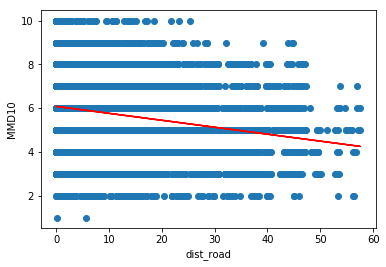

dist_road  VS MMD10 using Logistic: 0.22681336593317034


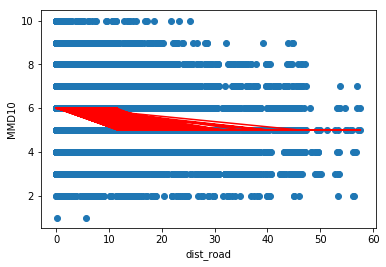

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


dist_popcenter  VS MMD10 using linear: 0.024510774481607545


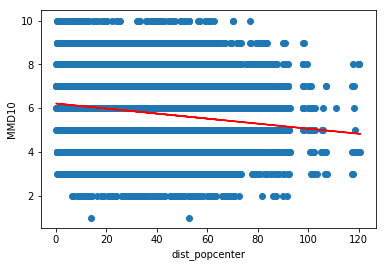

dist_popcenter  VS MMD10 using Logistic: 0.22510187449062755


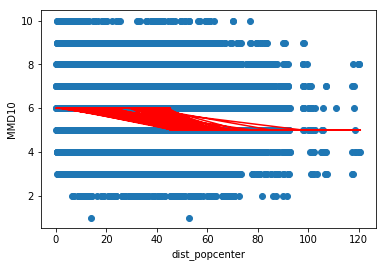

In [4]:
def regression(x,y):
    """

    """
    lm = linear.LinearRegression()
    lg = linear.LogisticRegression()
#     diet_grouped_df.dropna(subset=[a])
#     diet_grouped_df.dropna(subset=[b])
    array_x = np.array(diet_grouped_df[x]).reshape(-1,1)
    array_y = np.array(diet_grouped_df[y])
#     lm.fit(np.array(diet_grouped_df[a]).reshape(-1,1),diet_grouped_df[b])
    lm.fit(array_x,array_y)
    lg.fit(array_x,array_y)
#     model = ols(formula=x~y).fit()
    print("{}  VS {} using {}: {}".format(x,y,"linear", lm.score(array_x,array_y)))
    plot_regression(diet_grouped_df,x,y,lm.predict(array_x))
    print("{}  VS {} using {}: {}".format(x,y,"Logistic", lg.score(array_x,array_y)))
    plot_regression(diet_grouped_df,x,y,lg.predict(array_x))
    
def plot_regression(data,x,y,y_predicted):
    plt.scatter(data[x],data[y])
    plt.xlabel(str(x))
    plt.ylabel(str(y))
    plt.plot(data[x], y_predicted, color='r')
    plt.show()
    
regression("dist_road", "MMD10")
regression("dist_popcenter", "MMD10")
    

#### Histograms 

### Machine Learning Approach

##### Variables we will use in this prediction including "Primary_Religion","Travel_time_to_cities","PerCapita_GDP_2015","dist_popcenter","dist_road","Urban.Rural". We will be trying different classifiers including KNN, Decision Tree, Random Forest, Naive Bayes, Support Vector Machine and Nulti Layer Perceptron. We are interested to see if machine learning method can predict their Healthy food group score by considering varibles such as GDP, distance to city and etc. 

##### Read in the data

In [5]:
# df_1 = pandas.read_csv("datasets/Malawi Dat 20March.csv", keep_default_na=True)
# df_2 = pandas.read_excel("datasets/UrbanProtein.xlsx", keep_default_na=True)
aggregated_df = pandas.read_csv("datasets/Malawi Dat 20March.csv", keep_default_na=True)

###### Tried to gather the originial 

In [32]:
# cols_to_use = df_1.columns.difference(df_2.columns)
# print(cols_to_use)
# aggregated_df = pandas.merge(df_1,df_2,  how='inner', left_on=['dist_road'], right_on = ['dist_road'])
# overview(aggregated_df)

Index(['Cell_Coord_x', 'Cell_Coord_x_round', 'Cell_Coord_y',
       'Cell_Coord_y_round', 'Continent', 'GDP_PPP_1990', 'GDP_PPP_2000',
       'GDP_PPP_2015', 'ISO3C', 'ISO3N', 'Our_HouseholdId',
       'PerCapita_GDP_1990', 'PerCapita_GDP_2000', 'PerCapita_GDP_2015',
       'Percent_Christian', 'Percent_Primary_Religion', 'Population_1990',
       'Population_2000', 'Population_2015', 'Primary_Religion',
       'Travel_time_to_cities', 'Urban.Rural', 'World_Region'],
      dtype='object')
This dataset has 4558 entries 79 variables
   HouseholdId_x  Our_HouseholdId  Cell_Coord_y_round  Cell_Coord_x_round  \
0   1.010140e+11               59               -9.58               33.25   
1   1.010140e+11               59               -9.58               33.25   
2   1.010140e+11               59               -9.58               33.25   

   dist_road  dist_popcenter_x  MDD21_x  MDD22_x  MDD23_x  MDD24_x   ...     \
0       0.25         88.580002        1        1        1        0   ...   

##### Clean data

In [6]:
def string_to_int(df, col_name):
    """
    This is a helper function for converting the string labels to numerical
    """
    i = 0
    m = {}
    for e in df[col_name].unique():
        m.update({e: i})
        i += 1
    return m

def create_bins_width(df, col_name, bin_width):
    """
    This function cuts bins using equal width method
    """
    max = df[col_name].max()
    min = df[col_name].min()
    bins = np.arange(min, max, bin_width)
    new_col_name = col_name + " group"
    df[new_col_name] = np.digitize(df[col_name], bins)
    df.drop(col_name, axis=1, inplace=True)
    return df


def create_bins_depth(df, col_name, bin_num):
    """
    This function cuts bins using equal depth method
    """
    new_col_name = col_name + " group"
    df[new_col_name] = pandas.qcut(df[col_name], bin_num, labels=list(range(bin_num)))
    df[new_col_name] = df[new_col_name].astype(int)
    df.drop(col_name, axis=1, inplace=True)
    return df

def bin_label(df):
    """
    This function bin the labels to 3 classes.
    """
    bin = {}
    i = 1
    for i in range(1,11):
        if i >= 1 and i <= 4:
            bin[i] = 1
        if i >= 5 and i <=7:
            bin[i] = 2
        if i >= 8 and i <= 10:
            bin[i] = 3
    df["MMD10"] = df["MMD10"].map(bin)
    return df 

def clean_data(data, bin_class):
    m = string_to_int(data, "Primary_Religion")
#     data.replace({"Primary_Religion":m},inplace = True)
    data["Primary_Religion"] = data["Primary_Religion"].map(m)
    c = string_to_int(data, "Urban.Rural")
    data["Urban.Rural"] = data["Urban.Rural"].map(c)
#     data.replace({"Urban.Rural":c},inplace = True)
    data = data.replace(r'^\s*$', np.nan, regex=True)
    data = data.dropna()
    
    # Here we bin the data 
    data = create_bins_width(data,"Travel_time_to_cities",10)
    data = create_bins_depth(data,"PerCapita_GDP_2015",5)
    data = create_bins_width(data,"dist_popcenter",10)
    data = create_bins_width(data,"dist_road",6)
    
    #Optional: bin label
    if bin_class:
        data = bin_label(data)

    data.to_csv("cleaned_with_id.csv",encoding='utf-8', index=False)
    #Reorder the data
    data = data[['Primary_Religion', 'Urban.Rural','Travel_time_to_cities group','dist_popcenter group', 
            'dist_road group', 'MMD10']]
    
    #Print out the shape of our cleaned data, and number of instances in each class
    print("After cleaning, the shape of the data is {}".format(data.shape))
    print(np.unique(data["MMD10"]).shape[0])
    for i in range(1,np.unique(data["MMD10"]).shape[0]+1):
        print("Class {} has {}".format(i, data[data["MMD10"]== i].shape[0]))
    data.to_csv("cleaned.csv", encoding='utf-8', index=False)
    return data


##### Perform Machine Learning

In [7]:

def draw_roc_curve(name, model, X_validate, Y_validate):
    """
    This functions draws ROC graphs.
    """
    predicted_probas = model.predict_proba(X_validate)
    skplt.metrics.plot_roc(Y_validate, predicted_probas, title = "Roc Curve of {}".format(name))
    plt.show()
    # uncomment here to save the plots
    plt.savefig(name)


def plot_confusion_matrix(Y_pred, Y_validate, name):
    """
    This function plots the confusion matrix.
    """

    skplt.metrics.plot_confusion_matrix(Y_validate, Y_pred,title = "Confusion Matrix of {}".format(name))
    plt.show()
    # uncomment here to save the plots(Included in the write-up)
    # plt.savefig("cnf_matrix " + name)


def separate_training_testing(myData):
    """
    This function seperates the training sets and validation sets.
    """
    valueArray = myData.values
    X = valueArray[:, 0:myData.shape[1] - 1]
    Y = valueArray[:, myData.shape[1] - 1]
    test_size = 0.25
    seed = 7
    X_train, X_validate, Y_train, Y_validate = train_test_split(X, Y, test_size=test_size, random_state=seed)
    return X_train, X_validate, Y_train, Y_validate


def model_evaluate(X_train, X_validate, Y_train, Y_validate, num_folds, num_instances, seed, scoring, models):
    """
    This function handles evaluation of machine learning methods using cross validation 
    """
    results = []
    for name, model in models:

        # Get a prediction
        trained_model = model.fit(X_train, Y_train)
            
        Y_pred = trained_model.predict(X_validate)
        
        # Plot the condusion matrix and Roc curve
        plot_confusion_matrix(Y_pred, Y_validate, name)
        draw_roc_curve(name, trained_model, X_validate, Y_validate)
        print(accuracy_score(Y_validate,Y_pred))
        # Evalutate out models 
        kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=False)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        msg = "{} model's accuracy is {}, with a standard deviation of {}".format(name, cv_results.mean(), cv_results.std())
        
        print(msg)
                
def perform_ml(bin_class):
    """
    This function is the driver code for this machine learning prediction
    Args:
        bin_class: A boolean variable decides if we bin our label(MMD) or not. 
    """
    models = [('KNN', KNeighborsClassifier()), ('CART', DecisionTreeClassifier()),
                    ('RFC', RandomForestClassifier()), ('NB', GaussianNB()),('MLP', MLPClassifier(solver='sgd', alpha=1e-5
                    ,hidden_layer_sizes=(50, 3), random_state=1)),
                    ('SVM', svm.SVC(gamma=0.001, decision_function_shape='ovo', probability=True))]
    cleaned_df = clean_data(aggregated_df, bin_class)

    X_train, X_validate, Y_train, Y_validate = separate_training_testing(cleaned_df)
    model_evaluate(X_train, X_validate, Y_train, Y_validate, 10, len(X_train), 7, 'accuracy', models)

In [ ]:
perform_ml(False)

After cleaning, the shape of the data is (8357, 6)
3
Class 1 has 1835
Class 2 has 5058
Class 3 has 1464


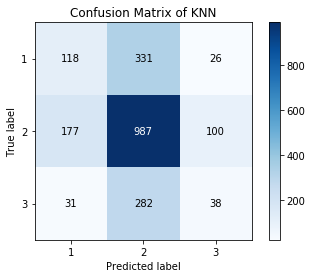

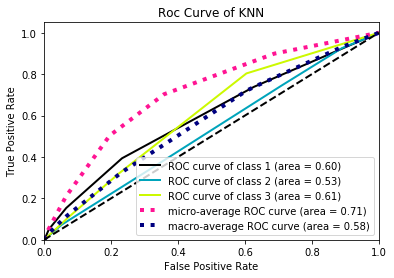

0.5468899521531101
KNN model's accuracy is 0.5527370561169114, with a standard deviation of 0.01956748889483218


<Figure size 432x288 with 0 Axes>

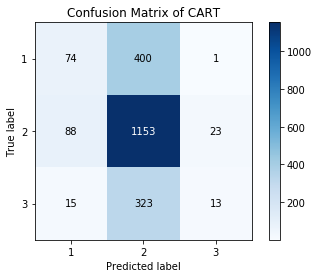

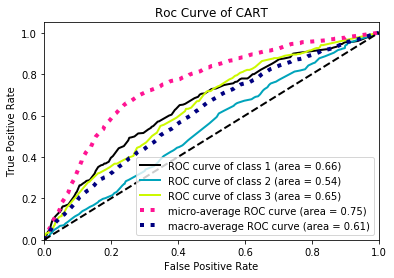

0.5933014354066986
CART model's accuracy is 0.5942232141492272, with a standard deviation of 0.010086568482711675


C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<Figure size 432x288 with 0 Axes>

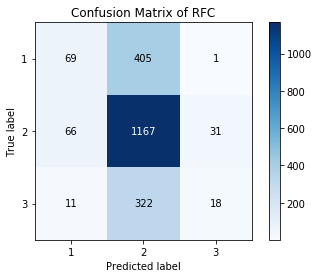

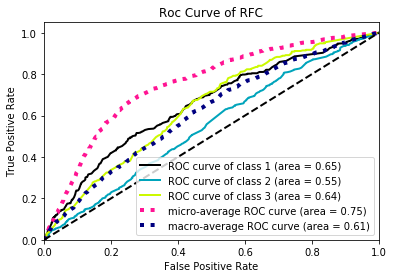

0.6
RFC model's accuracy is 0.5966181064045534, with a standard deviation of 0.01523190429217275


<Figure size 432x288 with 0 Axes>

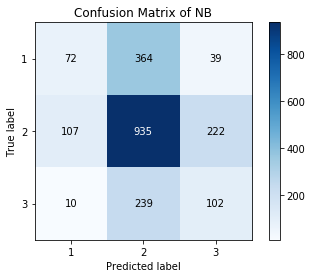

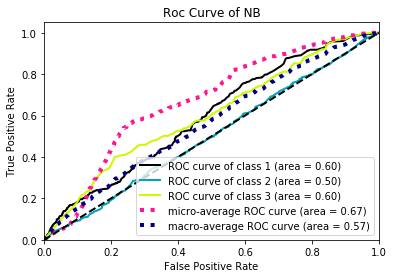

0.530622009569378
NB model's accuracy is 0.5358224926242414, with a standard deviation of 0.016162329146047167


<Figure size 432x288 with 0 Axes>

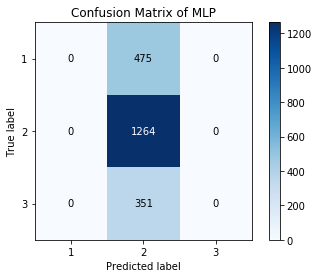

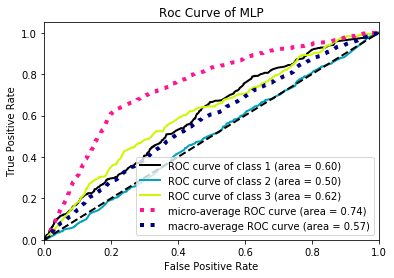

0.6047846889952153
MLP model's accuracy is 0.6055485067592012, with a standard deviation of 0.015171406863588685


<Figure size 432x288 with 0 Axes>

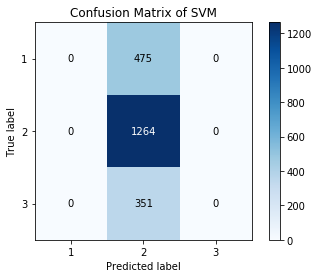

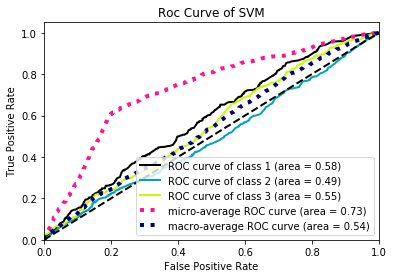

0.6047846889952153
SVM model's accuracy is 0.6053890171260274, with a standard deviation of 0.015223777002908695


<Figure size 432x288 with 0 Axes>

In [8]:
perform_ml(True)

#### Feature Enginnering 
##### From the previous results, we can see the accuracy is low, and the poor selection of the variables might have caused the low accuracy. Here we try some different variables to see if we can acheive a higher accuracy 

##### Merge dataset with the original dataset
###### Read in new dataset on age

In [11]:
df_age = pandas.read_csv("datasets/hh_mod_b.csv")

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (17,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


##### Gather number of people in different age groups. Maybe we can gather teenager percentages. 

In [12]:
bins = [-1, 8, 18, 35, 65, np.inf]
#Putting people into different age groups 
names = ['1', '2', '3', '4', '5']
df_age['hh_b05a'] = pandas.cut(df_age['hh_b05a'], bins, labels=names)

In [13]:
#Group them by the age group and transpose it to household level
df_age_group = df_age.groupby(['HHID','hh_b05a']).size().unstack()
df_age_group.rename(index=str, columns={"hh_b05a HHID": "HHID", "1": "baby_num"
                                       , "2": "teen_num"
                                       , "3": "adult_num"
                                       , "4": "middle_num"
                                        , "5": "elder_num"}, inplace = True)
df_age_group['HHID'] = df_age_group.index
# df_age_group.head(5)


def percent_age():
    col_name = ["baby_num","teen_num","adult_num","middle_num","elder_num"]
    for col in col_name:
        new_perc_col = col + " perc"
        merged_age_df[new_perc_col] = merged_age_df[col]/merged_age_df["hh_num"]

#We need the case id to merge with our original dataset
df_id = df_age[['HHID','case_id']].copy().drop_duplicates()
merged_age_df = df_age_group.merge(df_id,how='outer' ,on= 'HHID')
merged_age_df.fillna(0,inplace=True)
merged_age_df['hh_num'] = merged_age_df['baby_num'] + merged_age_df['teen_num']+merged_age_df['adult_num']+merged_age_df['middle_num']+merged_age_df['elder_num']
percent_age()
overview(merged_age_df)
print(merged_age_df["middle_num perc"].unique())

This dataset has 12447 entries 13 variables
   baby_num  teen_num  adult_num  middle_num  elder_num  \
0       0.0       1.0        0.0         1.0        1.0   
1       1.0       1.0        2.0         1.0        0.0   
2       1.0       2.0        1.0         1.0        0.0   

                               HHID       case_id  hh_num  baby_num perc  \
0  0001c970eecf473099368557e2080b3e  301025230225     3.0            0.0   
1  000509f5cfcc4b078a09672b09425e95  210374850204     5.0            0.2   
2  000bc107780044e59327dbf7ec960ac1  311057710075     5.0            0.2   

   teen_num perc  adult_num perc  middle_num perc  elder_num perc  
0       0.333333             0.0         0.333333        0.333333  
1       0.200000             0.4         0.200000        0.000000  
2       0.400000             0.2         0.200000        0.000000  
Index(['baby_num', 'teen_num', 'adult_num', 'middle_num', 'elder_num', 'HHID',
       'case_id', 'hh_num', 'baby_num perc', 'teen_num perc', '

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: 'HHID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version


###### Read in new dataset on land owning, 

In [14]:
df_land = pandas.read_csv("datasets/ag_mod_a.csv")
df_land = df_land[['case_id','ag_b101b']]
df_land.rename(index=str, columns={"ag_b101b": "own_land"}, inplace = True)

In [15]:
df_other = pandas.read_csv("datasets/hh_mod_x.csv")

###### Construct New Dataframe

In [18]:
new_feature_df = diet_grouped_df.merge(merged_age_df, left_on= 'HouseholdId', right_on = "case_id")
# new_feature_df = df_2.merge(df_land,how='inner', left_on= 'HouseholdId', right_on = "case_id")
# new_feature_df = new_feature_df.merge(df_other,how='inner', on= 'case_id')
overview(new_feature_df)

This dataset has 10 entries 43 variables
    HouseholdId  lat_modified  lon_modified  dist_road  dist_popcenter  MDD21  \
0  104041860012      -10.6387       34.1824       0.11       78.070000      1   
1  104041860043      -10.6387       34.1824       0.22       78.849998      1   
2  104041860074      -10.6387       34.1824       0.21       79.860001      1   

   MDD22  MDD23  MDD24  MDD25       ...        middle_num  elder_num  \
0      0      0      0      1       ...               0.0        0.0   
1      0      0      0      1       ...               0.0        0.0   
2      1      1      0      1       ...               1.0        0.0   

                               HHID       case_id  hh_num  baby_num perc  \
0  898e0dd608fc48038154eee28bc1b614  104041860012     6.0       0.500000   
1  a925b3d0984b479c85b99184eb2c96c4  104041860043     3.0       0.333333   
2  483851ba0f754097b92f16cf7e7b8818  104041860074     7.0       0.142857   

  teen_num perc  adult_num perc  middle_

In [102]:

def Diff(li1, li2): 
    li_dif = [i for i in li1 + li2 if i not in li1 or i not in li2] 
    return li_dif 


12447

In [19]:
merged_df = diet_group_df.merge(merged_age_df, on = ["HHID","case_id"])
overview(merged_df)

This dataset has 12447 entries 23 variables
        case_id                              HHID  hh_g08a  hh_g08b  hh_g08c  \
0  101011000030  c58e3284fee84a598b22086985e8212a      7.0      4.0      2.0   
1  101011000043  df2f79020a7a4b1c889edca2005183b8      6.0      3.0      3.0   
2  101011000053  755889c7f7294da39fb08cde3e0e70ee      7.0      1.0      2.0   

   hh_g08d  hh_g08e  hh_g08f  hh_g08g  hh_g08h       ...        teen_num  \
0      7.0      0.0      0.0      0.0      5.0       ...             0.0   
1      6.0      4.0      1.0      1.0      6.0       ...             0.0   
2      7.0      2.0      1.0      6.0      7.0       ...             2.0   

   adult_num  middle_num  elder_num  hh_num  baby_num perc  teen_num perc  \
0        0.0         1.0        1.0     2.0       0.000000       0.000000   
1        2.0         0.0        0.0     3.0       0.333333       0.000000   
2        1.0         1.0        0.0     6.0       0.333333       0.333333   

   adult_num perc  mi

In [91]:
len(Diff(merged_age_df['case_id'], original_df['case_id']))

1755027

In [23]:
print(len(set(diet_grouped_df["HouseholdId"])))
diet_grouped_df.HouseholdId.astype(np.int64)

len(set(diet_grouped_df["HouseholdId"]) & set(diet_group_df["case_id"]))

12270
0        101010160009
1        101010160033
2        101010160060
3        101010160068
4        101010160069
5        101010160070
6        101010160074
7        101010160086
8        101010160096
9        101010160143
10       101010160159
11       101010160180
12       101010160207
13       101010160235
14       101010160254
15       101010160265
16       101012040003
17       101012040007
18       101012040011
19       101012040020
20       101012040024
21       101012040028
22       101012040037
23       101012040041
24       101012040045
25       101012040054
26       101012040058
27       101012040062
28       101012040071
29       101012040075
             ...     
12240    315546130052
12241    315546130055
12242    315546130075
12243    315546130115
12244    315546130139
12245    315546130142
12246    315546130230
12247    315546130283
12248    315546130304
12249    315546130325
12250    315546130334
12251    315546130428
12252    315546130494
12253    315546130503
1225

10

In [ ]:

merged_df = diet_group_df.merge(merged_age_df, on = ["HHID","case_id"])

### Results Analysis: 